In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(url)

# Display the first few rows of the dataset
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


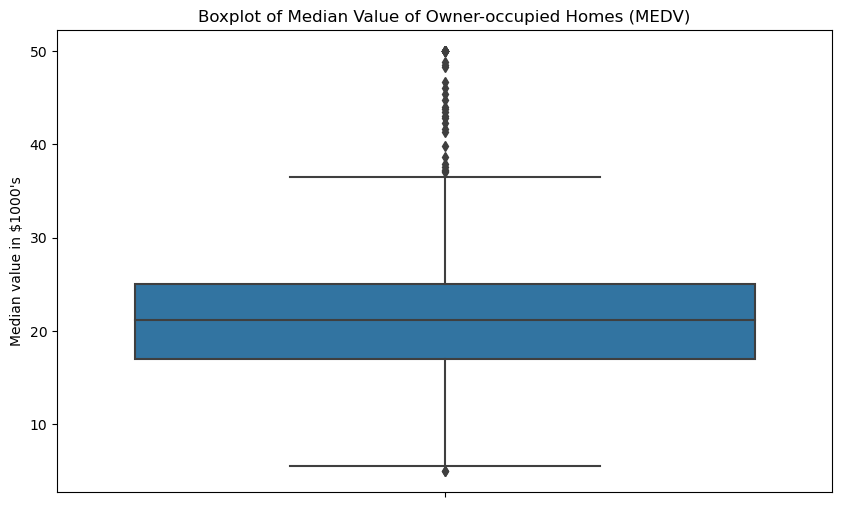

In [2]:
# Boxplot for MEDV
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-occupied Homes (MEDV)')
plt.ylabel('Median value in $1000\'s')
plt.show()

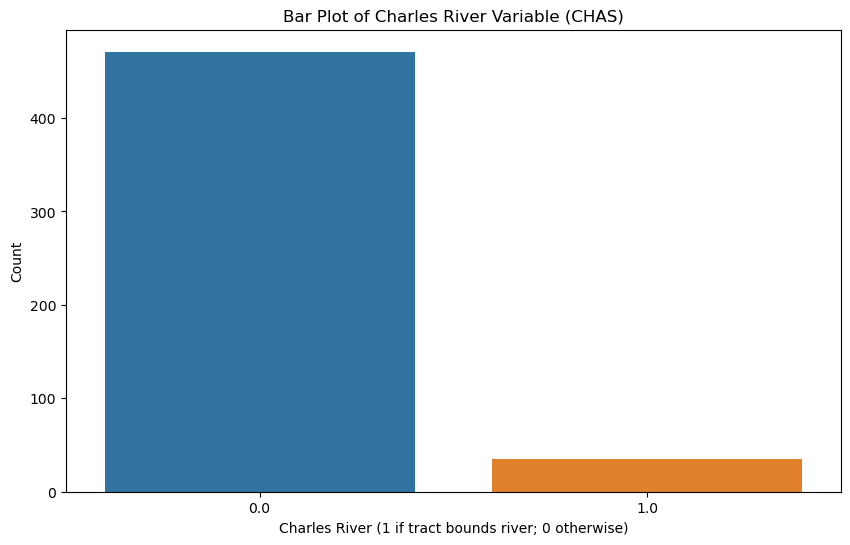

In [3]:
# Bar plot for CHAS
plt.figure(figsize=(10, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('Charles River (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()

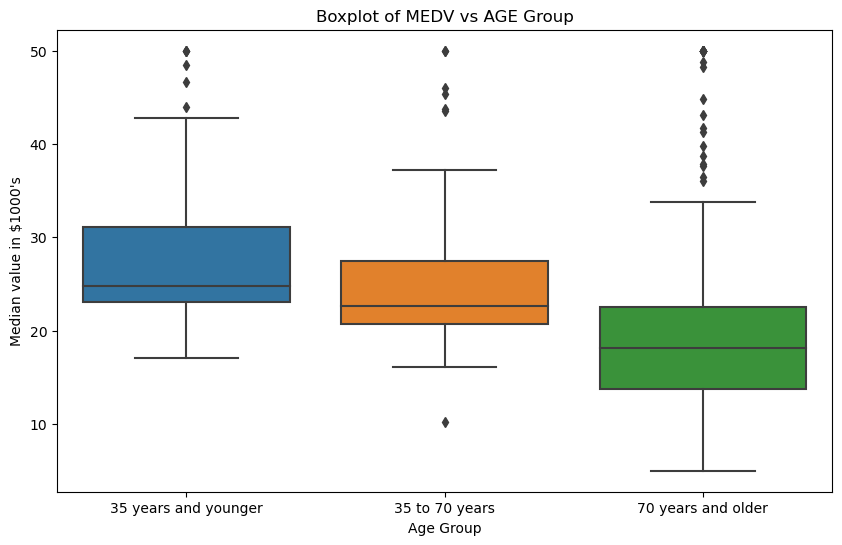

In [4]:
# Discretize AGE into three groups
bins = [0, 35, 70, 100]
labels = ['35 years and younger', '35 to 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Boxplot for MEDV vs AGE_group
plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('Age Group')
plt.ylabel('Median value in $1000\'s')
plt.show()

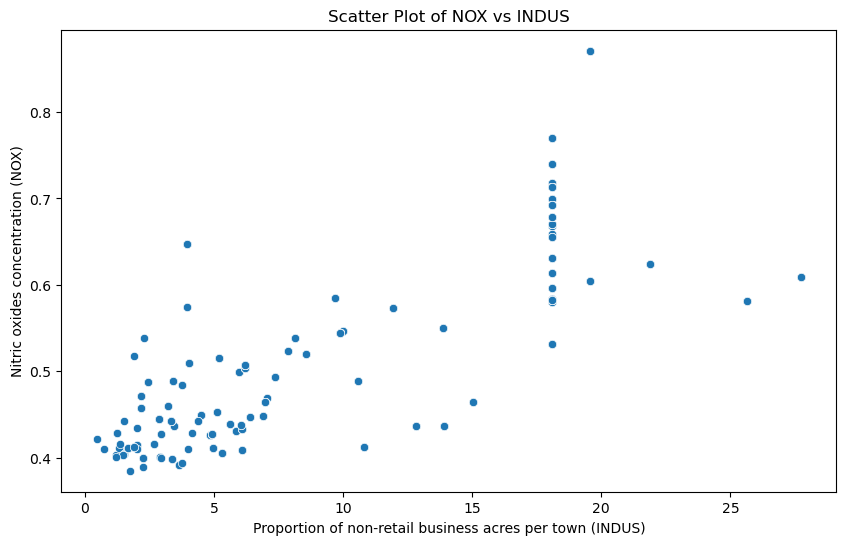

In [5]:
# Scatter plot of NOX vs INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of non-retail business acres per town (INDUS)')
plt.ylabel('Nitric oxides concentration (NOX)')
plt.show()


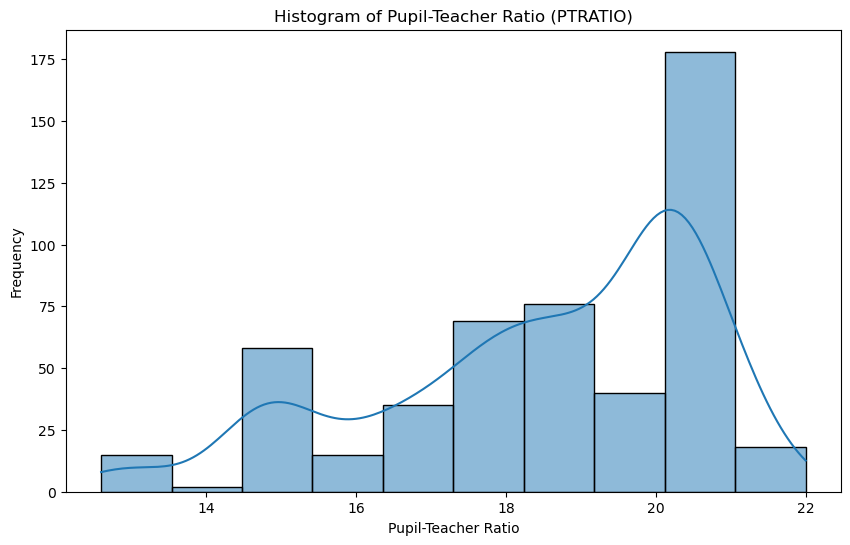

In [6]:
# Histogram for PTRATIO
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [7]:
#  T-test for Independent Samples: Median value of houses bounded by the Charles river
from scipy.stats import ttest_ind

# Separate the MEDV values based on the CHAS variable
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test
t_stat, p_value = ttest_ind(chas_1, chas_0)

# Display the results
t_stat, p_value


(3.996437466090509, 7.390623170519905e-05)

In [8]:
#ANOVA: Median values of houses (MEDV) for different AGE groups
from scipy.stats import f_oneway

# Separate the MEDV values based on the AGE groups
age_group1 = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
age_group2 = boston_df[boston_df['AGE_group'] == '35 to 70 years']['MEDV']
age_group3 = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

# Perform ANOVA
f_stat, p_value_anova = f_oneway(age_group1, age_group2, age_group3)

# Display the results
f_stat, p_value_anova


(36.40764999196599, 1.7105011022702984e-15)

In [9]:
#Pearson Correlation: Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr, p_value_corr = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Display the results
corr, p_value_corr


(0.763651446920915, 7.913361061241167e-98)

In [10]:
#Regression Analysis: Impact of weighted distance to the five Boston employment centres on the median value of owner-occupied homes
import statsmodels.api as sm

# Define the independent variable (DIS) and the dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression analysis
model_summary = model.summary()

# Display the results
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        15:20:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""